In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/monthly_milk_production.csv', index_col = 'Date', parse_dates=True)

<Axes: xlabel='Date'>

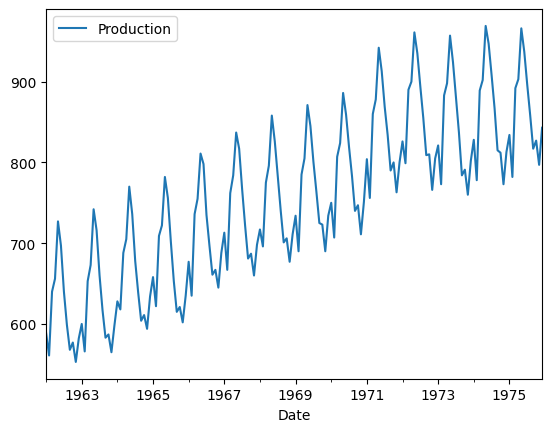

In [ ]:
data.plot()

In [ ]:
data.shape

(168, 1)

In [ ]:
train = data.iloc[:150]
test = data.iloc[150:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
n_inputs = 12
n_features = 1

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_inputs, batch_size = 1)

In [ ]:
nx, ny = generator[0]

In [ ]:
nx.flatten()

array([0.08653846, 0.01923077, 0.20913462, 0.24759615, 0.41826923,
       0.34615385, 0.20913462, 0.11057692, 0.03605769, 0.05769231,
       0.        , 0.06971154])

In [ ]:
ny

array([[0.11298077]])

In [ ]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (n_inputs, n_features)))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [ ]:
model.fit(generator, epochs = 50)

Epoch 1/50
138/138 [==============================] - 2s 5ms/step - loss: 0.0722 - accuracy: 0.0072
Epoch 2/50
138/138 [==============================] - 1s 5ms/step - loss: 0.0222 - accuracy: 0.0072
Epoch 3/50
138/138 [==============================] - 1s 5ms/step - loss: 0.0221 - accuracy: 0.0072
Epoch 4/50
138/138 [==============================] - 1s 6ms/step - loss: 0.0144 - accuracy: 0.0072
Epoch 5/50
138/138 [==============================] - 1s 6ms/step - loss: 0.0120 - accuracy: 0.0072
Epoch 6/50
138/138 [==============================] - 1s 5ms/step - loss: 0.0085 - accuracy: 0.0072
Epoch 7/50
138/138 [==============================] - 1s 5ms/step - loss: 0.0107 - accuracy: 0.0072
Epoch 8/50
138/138 [==============================] - 1s 4ms/step - loss: 0.0065 - accuracy: 0.0072
Epoch 9/50
138/138 [==============================] - 1s 5ms/step - loss: 0.0044 - accuracy: 0.0072
Epoch 10/50
138/138 [==============================] - 1s 4ms/step - loss: 0.0041 - accuracy: 0.0072

In [ ]:
ltb = scaled_train[-12:]
ltb = ltb.reshape((1, n_inputs, n_features))
model.predict(ltb)

1/1 [==============================] - 0s 130ms/step


array([[0.8462265]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.85336538])

In [ ]:
tp = []
ltb = scaled_train[-12:]
ltb = ltb.reshape((1, n_inputs, n_features))

for i in range(len(test)):
  cp = model.predict(ltb)[0]
  tp.append(cp)
  ltb = np.append(ltb[:,1:,:],[[cp]],axis = 1)

[[[0.78846154]
  [0.68269231]
  [0.55528846]
  [0.57211538]
  [0.49759615]
  [0.59855769]
  [0.66105769]
  [0.54086538]
  [0.80769231]
  [0.83894231]
  [1.        ]
  [0.94711538]]]
1/1 [==============================] - 0s 16ms/step


In [ ]:
y_pred = scaler.inverse_transform(tp)

In [ ]:
test['y_pred'] = y_pred

<ipython-input-81-d4086c79cafd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['y_pred'] = y_pred


In [ ]:
test

,Production,y_pred
Date,,
1974-07-01,908,905.030230
1974-08-01,867,854.109083
1974-09-01,815,812.930275
1974-10-01,812,800.871811
1974-11-01,773,787.523285
1974-12-01,813,806.347012
1975-01-01,834,821.777817
1975-02-01,782,821.591627
1975-03-01,892,891.264965


<Axes: xlabel='Date'>

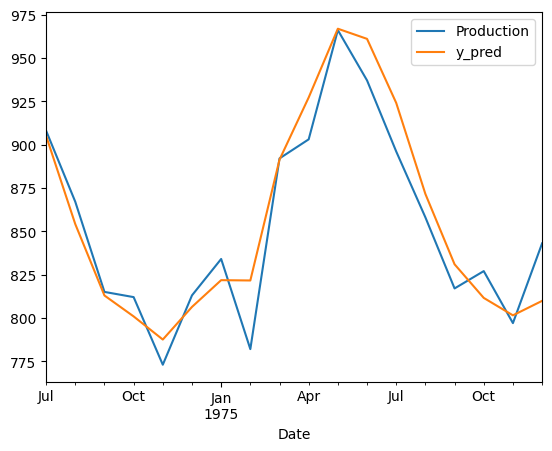

In [ ]:
test.plot()

In [ ]:
from sklearn.metrics import r2_score, accuracy_score

In [ ]:
r2_score(test['Production'], test['y_pred'])

0.8824830179897218